In [1]:
import sys
sys.path.append('/home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [2]:
SORTER_PATH = '/itet-stor/kvulic/neuronies/TANGO2/Kate/Sorters_2/'
OUTPUT_PATH = '/itet-stor/kvulic/neuronies/TANGO2/Kate/Plots/'

In [54]:
# Define the function to extract DIV and ID from folder names
def extract_info_from_folder(folder_name):
    filename_parts = folder_name.split('_')
    split_length = len(filename_parts)
    print(filename_parts)
    # Extract DIV and ID from the folder name
    div = int(filename_parts[3][3:]) 
    if split_length == 10 or split_length == 11:
        label = "TO1_B5"
    elif split_length == 8:
        label = "CTRL"
    elif split_length == 9:
        label = "TO2_w/o_B5"
    else:
        raise ValueError(f"Unknown ID {label} in folder {folder_name}")
    return div, label

# Main function to process the folders and generate the plot
def process_folders_and_plot(base_folder_path):
    # List to collect data
    data = []
    
    # Iterate over each folder in the base directory
    for folder_name in os.listdir(base_folder_path):
        folder_path = os.path.join(base_folder_path, folder_name)
        analyzer_path = os.path.join(folder_path, 'sorter_output')
        if os.path.exists(analyzer_path):
            # Ensure it's a directory
            if os.path.isdir(folder_path):
                try:
                    print(f"Velocity values found for {folder_name}.")
                    # Extract DIV and ID from the folder name
                    div, label = extract_info_from_folder(folder_name)
                    print(div, label)
                    
                    # Path to the template_metrics.csv file
                    csv_path = os.path.join(folder_path, 'template_metrics.csv')
                    
                    # Read the CSV file
                    df = pd.read_csv(csv_path)

                    # Append the data with DIV, ID, and label information
                    for velocity in df['velocity_above']:
                        if not np.isnan(velocity):
                            velocity = np.abs(velocity)/1000
                            data.append({'DIV': div, 'label': label, 'velocity': velocity})
                    for velocity in df['velocity_below']:
                        if not np.isnan(velocity):
                            velocity = np.abs(velocity)/1000
                            data.append({'DIV': div, 'label': label, 'velocity': velocity})
                
                except Exception as e:
                    #print(f"Error processing folder {folder_name}: {e}")
                    pass
        else:
            print(f"Folder {folder_name} does not contain good clusters.")
   

    combined_df = pd.DataFrame(data)

    # Group by DIV, label and calculate the mean velocity
    mean_df = combined_df.groupby(['DIV', 'label']).mean().reset_index()


    
    return combined_df, mean_df

In [55]:
all_df, mean_df = process_folders_and_plot(SORTER_PATH)


Velocity values found for Sorter_ID1731_N8_DIV21_DATE20240920_1430_spontaneous_TANGO2_TO1_B5.raw.h5.
['Sorter', 'ID1731', 'N8', 'DIV21', 'DATE20240920', '1430', 'spontaneous', 'TANGO2', 'TO1', 'B5.raw.h5']
21 TO1_B5
Velocity values found for Sorter_ID1823_N8_DIV14_DATE20240906_1108_spontaneous_CTRL.raw.h5.
['Sorter', 'ID1823', 'N8', 'DIV14', 'DATE20240906', '1108', 'spontaneous', 'CTRL.raw.h5']
14 CTRL
Velocity values found for Sorter_ID1731_N0_DIV28_DATE20240502_1133_spontaneous_CTRL.raw.h5.
['Sorter', 'ID1731', 'N0', 'DIV28', 'DATE20240502', '1133', 'spontaneous', 'CTRL.raw.h5']
28 CTRL
Velocity values found for Sorter_ID1773_N3_DIV21_DATE20240920_1528_spontaneous_CTRL.raw.h5.
['Sorter', 'ID1773', 'N3', 'DIV21', 'DATE20240920', '1528', 'spontaneous', 'CTRL.raw.h5']
21 CTRL
Velocity values found for Sorter_ID1823_N2_DIV21_DATE20240920_1525_spontaneous_CTRL.raw.h5.
['Sorter', 'ID1823', 'N2', 'DIV21', 'DATE20240920', '1525', 'spontaneous', 'CTRL.raw.h5']
21 CTRL
Velocity values found fo

In [56]:
temp = all_df[all_df['label'] == 'TO1_B5']
temp = temp[temp['DIV'] == 27]
temp


,DIV,label,velocity


In [31]:
all_df[all_df['label'] == 'TO1_B5'].dropna()


,DIV,label,velocity
536,21,TO1_B5,0.294704
537,21,TO1_B5,0.638930
538,21,TO1_B5,0.238697
539,21,TO1_B5,0.267937
540,21,TO1_B5,0.135592
...,...,...,...
806,21,TO1_B5,0.407711
807,21,TO1_B5,0.449128
808,21,TO1_B5,2.014767
809,21,TO1_B5,0.439199


In [57]:
import pandas as pd

def add_week_column(df):
    """
    Adds a 'Week' column to the DataFrame based on the values in the 'DIV' column.

    DIV -> Week mappings:
    - DIV 14 -> Week 2
    - DIV 21 -> Week 3
    - DIV 27 or 28 -> Week 4
    
    If no matching DIV, 'Week' will be NaN.
    
    Args:
    df (pd.DataFrame): The input DataFrame with a 'DIV' column.
    
    Returns:
    pd.DataFrame: The updated DataFrame with the new 'Week' column.
    """
    
    # Define a function to map DIV values to Week numbers
    def map_div_to_week(div_value):
        if div_value == 14:
            return 2
        elif div_value == 21:
            return 3
        elif div_value in [27, 28]:
            return 4
        else:
            return None  # If DIV does not match, return None
    
    # Apply the mapping function to the 'DIV' column and create a new 'Week' column
    df['Week'] = df['DIV'].apply(map_div_to_week)
    
    return df

updated_df = add_week_column(all_df)
updated_mean = add_week_column(mean_df)
updated_df = updated_df.dropna()
updated_mean = updated_mean.dropna()
# print(updated_df)
updated_df[updated_df['label'] == 'TO1_B5']

,DIV,label,velocity,Week
536,21,TO1_B5,0.294704,3.0
537,21,TO1_B5,0.638930,3.0
538,21,TO1_B5,0.238697,3.0
539,21,TO1_B5,0.267937,3.0
540,21,TO1_B5,0.135592,3.0
...,...,...,...,...
806,21,TO1_B5,0.407711,3.0
807,21,TO1_B5,0.449128,3.0
808,21,TO1_B5,2.014767,3.0
809,21,TO1_B5,0.439199,3.0


In [58]:
updated_df.to_csv(OUTPUT_PATH + 'all_data.csv', index=False)
updated_mean.to_csv(OUTPUT_PATH + 'mean_data.csv', index=False)

In [41]:
updated_df = updated_df.dropna()
test = updated_df[updated_df['label'] == 'CTRL']

In [43]:
test[test['velocity'] > 2.]

,DIV,label,velocity,Week
207,28,CTRL,3.828033,4.0
570,28,CTRL,11.732547,4.0
596,28,CTRL,2.065607,4.0
615,28,CTRL,2.213569,4.0
774,28,CTRL,2.388201,4.0
1152,21,CTRL,2.989174,3.0
1193,28,CTRL,7.341687,4.0


In [59]:
df_wo_14 = updated_df[updated_df['DIV'] != 14]
df_wo_14 = df_wo_14[df_wo_14['label'] != 'TO1_B5']
df_filtered = df_wo_14
df_filtered = df_wo_14[df_wo_14['velocity'] < 5]

In [49]:
df_filtered.head()

,DIV,label,velocity,Week
0,27,CTRL,1.268959,4.0
1,27,CTRL,2.163113,4.0
2,28,CTRL,0.411624,4.0
3,28,CTRL,0.635321,4.0
4,28,CTRL,0.318011,4.0


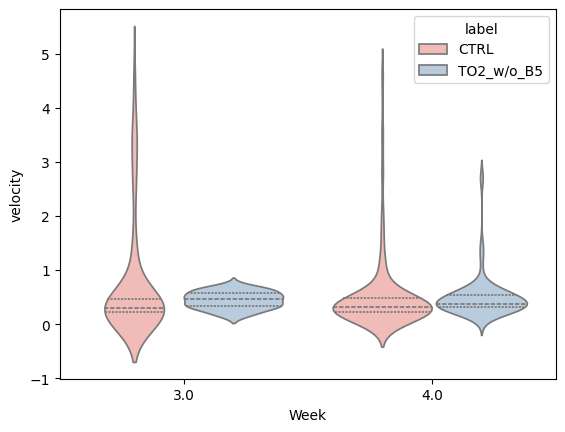

In [60]:
sns.violinplot(x='Week', y='velocity', hue='label', data=df_filtered, palette = 'Pastel1', split=False, inner='quartile')
plt.savefig(OUTPUT_PATH + 'conduction_speed_violin_plot.svg', format = 'svg', dpi = 300)
plt.savefig(OUTPUT_PATH + 'conduction_speed_violin_plot.pdf', format = 'pdf', dpi = 300)

In [8]:
all_df.dropna()

,DIV,label,velocity,Week
22,28,CTRL,0.604933,4.0
30,28,CTRL,1.497452,4.0
46,28,CTRL,0.182636,4.0
48,28,CTRL,0.639481,4.0
58,28,CTRL,0.651726,4.0
...,...,...,...,...
2071,27,TO2_w/o_B5,0.600595,4.0
2072,27,TO2_w/o_B5,0.627749,4.0
2073,27,TO2_w/o_B5,0.578761,4.0
2074,27,TO2_w/o_B5,0.828676,4.0


In [23]:
df_to2_all = all_df[all_df['label'] == 'TO2_w/o_B5'].dropna()

In [24]:
df_to2_all

,DIV,label,velocity
287,21,TO2_w/o_B5,1.143765
290,21,TO2_w/o_B5,1.151086
292,27,TO2_w/o_B5,0.560591
293,27,TO2_w/o_B5,0.588468
294,27,TO2_w/o_B5,1.224994
295,27,TO2_w/o_B5,0.597625
297,27,TO2_w/o_B5,0.593464
299,27,TO2_w/o_B5,0.575695
300,27,TO2_w/o_B5,0.591833
301,27,TO2_w/o_B5,1.083332


In [55]:
df_filtered

,DIV,label,velocity,Week
13,21,TO2_w/o_B5,1.143765,3.0
16,21,TO2_w/o_B5,1.151086,3.0
18,27,TO2_w/o_B5,0.560591,4.0
19,27,TO2_w/o_B5,0.588468,4.0
20,27,TO2_w/o_B5,1.224994,4.0
...,...,...,...,...
1583,27,TO2_w/o_B5,0.600595,4.0
1584,27,TO2_w/o_B5,0.627749,4.0
1585,27,TO2_w/o_B5,0.578761,4.0
1586,27,TO2_w/o_B5,0.828676,4.0


In [16]:
#df_filtered.groupby('Week', 'label').size().reset_index(name='counts')
df_count = df_filtered.groupby(['Week', 'label']).size().reset_index(name='counts')
df_count

,Week,label,counts
0,3.0,CTRL,24
1,3.0,TO2_w/o_B5,18
2,4.0,CTRL,74
3,4.0,TO2_w/o_B5,39


Text(0, 0.5, 'Number of active units')

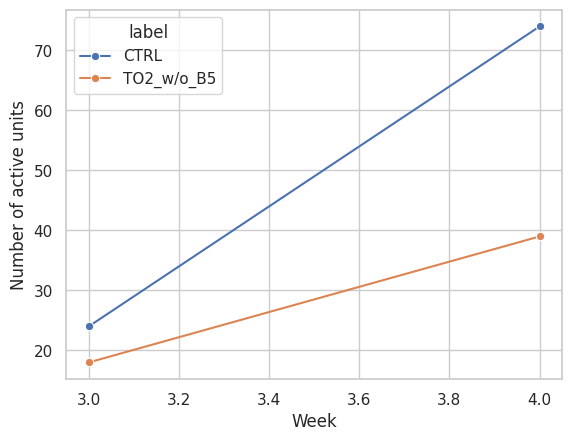

In [18]:
sns.lineplot(x = 'Week', y = 'counts', marker = 'o', hue = 'label', data = df_count)
plt.xlabel('Week')
plt.ylabel('Number of active units')

<Axes: xlabel='DIV', ylabel='velocity'>

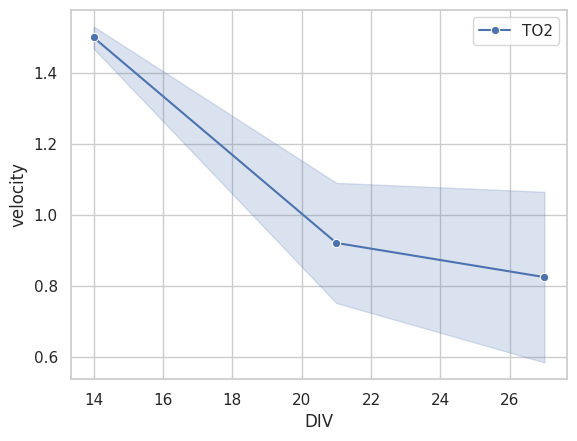

In [33]:
sns.lineplot(x='DIV', y='velocity', markers = True, data=df_to2_all, errorbar='sd', label = 'TO2', linestyle = '-',marker = 'o')  # 'ci' parameter controls the confidence interval (default is 95%)

In [32]:
def get_electrode_channel_mapping(raw_data) -> np.array:
        """
        Retrieves electrode-to-channel mapping from the HDF5 file.

        :param raw_data: The HDF5 file data.
        :return: A np.array containing the electrode to channel mapping.
        """
        # Get the clean absolute and relative indices of the spiking information.
        electrode_info = np.asarray(raw_data["mapping"]["channel", "electrode"])
        mask = [i["electrode"] != -1 for i in electrode_info]
        clean_abs_ids = np.asarray([i[0]["electrode"][i[1]] for i in zip(electrode_info, mask)], dtype=np.int32)
        clean_rel_ids = np.asarray([i[0]["channel"][i[1]] for i in zip(electrode_info, mask)], dtype=np.int32)

        # Map the relative indices to the absolute indices of the spiking information
        electrode_channel_mapping = np.zeros([2, clean_rel_ids.shape[0]], dtype=np.int32)
        electrode_channel_mapping[0, :] = np.squeeze(clean_abs_ids)
        electrode_channel_mapping[1, :] = np.squeeze(clean_rel_ids)

        del electrode_info
        del mask
        del clean_abs_ids
        del clean_rel_ids

        return electrode_channel_mapping

In [2]:
import spikeinterface.full as si
import h5py

/usr/itetnas04/data-scratch-01/kvulic/data/conda_envs/spikesort/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
raw_data = h5py.File('/itet-stor/kvulic/neuronies/single_neurons/1_Subprojects/Small_Network_Plasticity/3_Processed_Data/BCM_Test/Recordings_to_sort/ID1821_1_DIV45_DATE20240405_0807_spontaneous_before_BCMFreq_Freq40.raw.h5', "r")

electrode_channel_mapping = get_electrode_channel_mapping(raw_data)

In [34]:
channels_for_traces = electrode_channel_mapping[1, :]

In [35]:
import h5py
traces_orig = raw_data.get("sig")[channels_for_traces, 500:100000]

In [45]:
traces_orig.shape

(774, 99500)

In [49]:

recording = si.read_maxwell(file_path='/itet-stor/kvulic/neuronies/single_neurons/1_Subprojects/Small_Network_Plasticity/3_Processed_Data/BCM_Test/Recordings_to_sort/ID1821_1_DIV45_DATE20240405_0807_spontaneous_before_BCMFreq_Freq40.raw.h5')
traces = recording.get_traces(start_frame = 500, end_frame = 100000)
recording = si.bandpass_filter(recording=recording,
                                                              freq_min=200,
                                                              dtype='float32')


recording = si.common_reference(recording)

recording = si.clip(recording=recording, a_max=1200)
traces_filt = recording.get_traces(start_frame = 500, end_frame = 100000)

In [59]:
traces[:,0].shape

(99500,)

In [66]:
def convert_elno_to_xy(elno):
    chipWidth = 220
    x = int(elno/chipWidth)
    y = elno % chipWidth
    return x,y
def convert_xy_to_elno(x,y):
    chipWidth = 220
    elno = x * chipWidth + y
    return elno

In [76]:
np.where(traces_filt == np.max(traces_filt))

(array([55519]), array([251]))

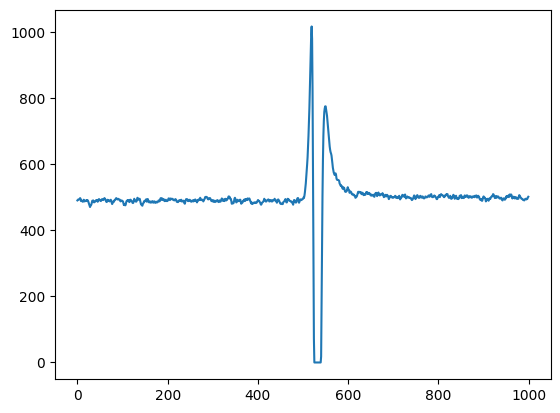

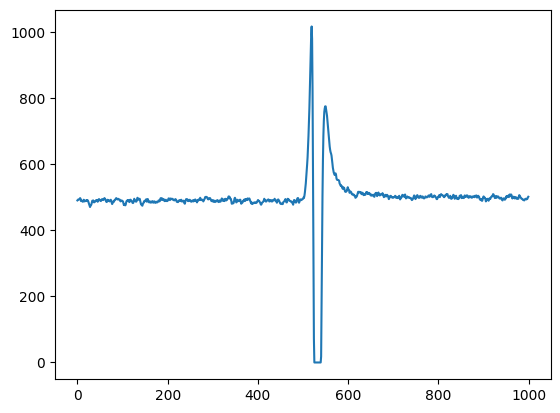

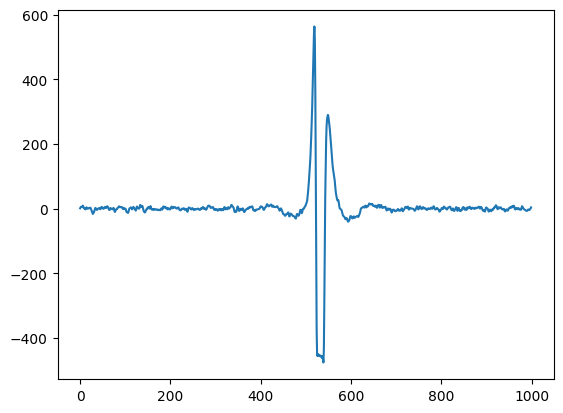

In [78]:
plt.plot(traces_orig[251][55000:56000])
plt.show()
plt.plot(traces[:,251][55000:56000])
plt.show()
plt.plot(traces_filt[:,251][55000:56000])
plt.show()